In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/carprice/carprice.csv


In [57]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
carmodel=LinearRegression()

In [15]:
df = pd.read_csv("/kaggle/input/carprice/carprice.csv")
df

,Car model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


Text(0, 0.5, 'Selling Price')

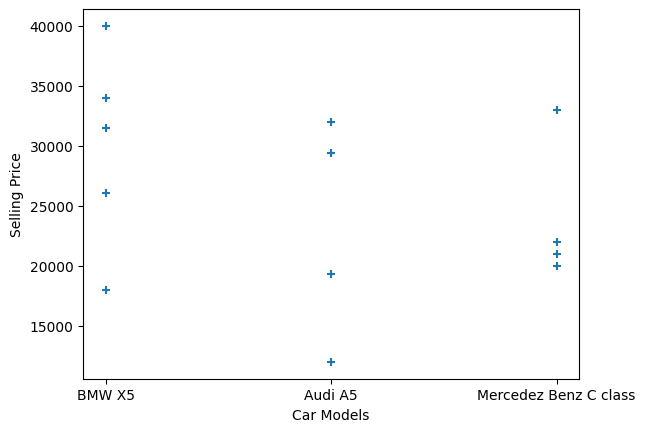

In [21]:
plt.scatter(df['Car model'], df['Sell Price($)'], marker='+')
plt.xlabel("Car Models")
plt.ylabel("Selling Price")

In [25]:
dummies=pd.get_dummies(df['Car model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,True,False,False
6,True,False,False
7,True,False,False
8,True,False,False
9,False,False,True


In [30]:
mergedf = pd.concat([df,dummies], axis ="columns")
mergedf

,Car model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,False,True,False
1,BMW X5,35000,34000,3,False,True,False
2,BMW X5,57000,26100,5,False,True,False
3,BMW X5,22500,40000,2,False,True,False
4,BMW X5,46000,31500,4,False,True,False
5,Audi A5,59000,29400,5,True,False,False
6,Audi A5,52000,32000,5,True,False,False
7,Audi A5,72000,19300,6,True,False,False
8,Audi A5,91000,12000,8,True,False,False
9,Mercedez Benz C class,67000,22000,6,False,False,True


In [35]:
finaldf = mergedf.drop(['Car model', 'Audi A5'], axis='columns')
finaldf

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,True,False
1,35000,34000,3,True,False
2,57000,26100,5,True,False
3,22500,40000,2,True,False
4,46000,31500,4,True,False
5,59000,29400,5,False,False
6,52000,32000,5,False,False
7,72000,19300,6,False,False
8,91000,12000,8,False,False
9,67000,22000,6,False,True


In [42]:
x= finaldf.drop(["Sell Price($)"], axis = "columns")
x

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,69000,6,True,False
1,35000,3,True,False
2,57000,5,True,False
3,22500,2,True,False
4,46000,4,True,False
5,59000,5,False,False
6,52000,5,False,False
7,72000,6,False,False
8,91000,8,False,False
9,67000,6,False,True


In [47]:
y=finaldf['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [60]:
carmodel.fit(x,y)

LinearRegression()

**Price of Mercedez Benz C class with mileage 45000 and 4 years old**

In [83]:
test_data= {
    'Mileage' : [45000],
    'Age(yrs)': [4],
    'BMW X5'  : False,
    'Mercedez Benz C class': True
}
x_test=pd.DataFrame(test_data)
x_test

carmodel.predict(x_test)

array([36991.31721061])

**Price of BMW X5 with mileage 86000 and 7 yrs old**

In [82]:
test_data= {
    'Mileage' : [86000],
    'Age(yrs)': [7],
    'BMW X5'  : True,
    'Mercedez Benz C class': False
}
x_test=pd.DataFrame(test_data)

carmodel.predict(x_test)
 

array([11080.74313219])

****Price of Audi A5 with mileage 25000 and 2 yrs old ******

In [84]:
test_data= {
    'Mileage' : [25000],
    'Age(yrs)': [2],
    'BMW X5'  : False,
    'Mercedez Benz C class': False
}
x_test=pd.DataFrame(test_data)

carmodel.predict(x_test)
 

array([44605.12561634])

In [72]:
carmodel.score(x,y)

0.9417050937281083